PyGSLIB
========

Histplot
---------------





In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib as gslib  
import numpy as np

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= gslib.read_gslib_file('../datasets/cluster.dat')  

In [3]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0
mydata['bhid']=1

# printing to verify results
print ' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5)

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619          0   
1        5.5        1.5     0.06       0.27                1.619          0   
2       38.5        5.5     0.08       0.40                1.416          0   
3       20.5        1.5     0.09       0.39                1.821          0   
4       27.5       14.5     0.09       0.24                1.349          0   

   bhid  
0     1  
1     1  
2     1  
3     1  
4     1  


/home/adrian/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


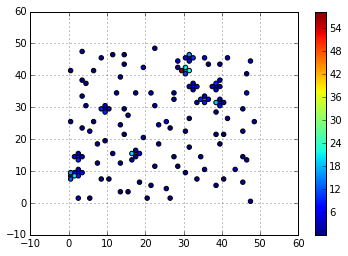

In [4]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## Testing histplot

This is not plotting results but is handy to get declustered bins for plots 



In [5]:
print gslib.__plot.histplt.__doc__

binval,nincls,cl,clwidth,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax,xcvr,xmen,xvar,xfrmx,dcl,error = histplt(hmin,hmax,ncl,iwt,ilog,icum,va,wt,[nd])

Wrapper for ``histplt``.

Parameters
----------
hmin : input float
hmax : input float
ncl : input int
iwt : input int
ilog : input int
icum : input int
va : input rank-1 array('d') with bounds (nd)
wt : input rank-1 array('d') with bounds (nd)

Other Parameters
----------------
nd : input int, optional
    Default: len(va)

Returns
-------
binval : rank-1 array('d') with bounds (ncl)
nincls : rank-1 array('d') with bounds (ncl)
cl : rank-1 array('d') with bounds (ncl)
clwidth : rank-1 array('d') with bounds (ncl)
xpt025 : float
xlqt : float
xmed : float
xuqt : float
xpt975 : float
xmin : float
xmax : float
xcvr : float
xmen : float
xvar : float
xfrmx : float
dcl : float
error : int



In [6]:
mydata['Declustering Weight'].sum()

140.00299999999999

In [7]:
parameters_histplot = {
        'hmin' : 0.06,                          #in/output rank-0 array(float,'d')
        'hmax' : 20.06,                         #in/output rank-0 array(float,'d')
        'ncl'  : 40,                            #int, number of bins
        'iwt'  : 0,                             #int, 1 use declustering weight
        'ilog' : 1,                             #int, 1 use logscale
        'icum' : 0,                             #int, 1 use cumulative
        'va'   : mydata['Primary'],             # array('d') with bounds (nd)
        'wt'   : mydata['Declustering Weight']} # array('d') with bounds (nd), wight variable (obtained with declust?)


parameters_histplotd = {
        'hmin' : 0.06,                          #in/output rank-0 array(float,'d')
        'hmax' : 20.06,                         #in/output rank-0 array(float,'d')
        'ncl'  : 40,                            #int, number of bins
        'iwt'  : 1,                             #int, 1 use declustering weight
        'ilog' : 1,                             #int, 1 use logscale
        'icum' : 0,                             #int, 1 use cumulative
        'va'   : mydata['Primary'],             # array('d') with bounds (nd)
        'wt'   : mydata['Declustering Weight']} # array('d') with bounds (nd), wight variable (obtained with declust?)


binval,nincls,cl, clwidth,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax,xcvr,xmen,xvar,xfrmx,dcl,error = gslib.__plot.histplt(**parameters_histplot)
binvald,ninclsd,cld, clwidthd, xpt025d,xlqtd,xmedd,xuqtd,xpt975d,xmind,xmaxd,xcvrd,xmend,xvard,xfrmxd,dcld,errord = gslib.__plot.histplt(**parameters_histplotd)


In [8]:
print dcl
print cl.round(1)
print nincls
print binval.round(2)

mydata.Primary[mydata.Primary>20.1]

0.1
[   0.     0.     0.     0.     0.     0.     0.1    0.1    0.1    0.1
    0.1    0.2    0.2    0.3    0.3    0.4    0.5    0.6    0.8    1.
    1.3    1.6    2.     2.5    3.2    4.     5.     6.3    7.9   10.
   12.6   15.8   20.    25.1   31.6   39.8   50.1   63.1   79.4  100. ]
[  0.   0.   0.   0.   0.   0.   2.   0.   3.   4.   0.   7.   2.   4.   5.
   3.   3.   4.  10.   6.   6.   9.   9.  11.   9.   4.   8.   7.  10.   3.
   3.   4.   3.   0.   0.   0.   1.   0.   0.   0.]
[ 0.    0.    0.    0.    0.    0.    0.01  0.    0.02  0.03  0.    0.05
  0.01  0.03  0.04  0.02  0.02  0.03  0.07  0.04  0.04  0.06  0.06  0.08
  0.06  0.03  0.06  0.05  0.07  0.02  0.02  0.03  0.02  0.    0.    0.
  0.01  0.    0.    0.  ]


111    20.35
132    58.32
134    21.08
135    22.75
Name: Primary, dtype: float64

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f697f471c10>>

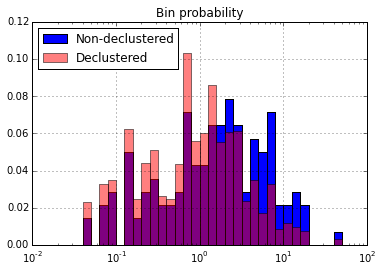

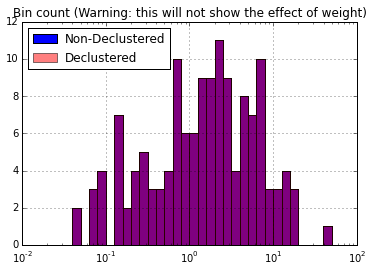

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Bin probability')
plt.bar (cl, binval, width=-clwidth, label = 'Non-declustered')
plt.bar (cld, binvald, width=-clwidth, alpha=0.5, color='r', label = 'Declustered')
if parameters_histplot['ilog']>0:
    ax.set_xscale('log')
plt.grid(True)
plt.legend(loc=2)
fig.show

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Bin count (Warning: this will not show the effect of weight)')
plt.bar (cl, nincls, width=-clwidth,label = 'Non-Declustered')
plt.bar (cld, ninclsd, width=-clwidth, alpha=0.5, color='r',label = 'Declustered')
if parameters_histplot['ilog']>0:
    ax.set_xscale('log')
plt.grid(True)
plt.legend(loc=2)
fig.show

In [10]:
parameters_histplot = {
        'hmin' : 0.06,                          #in/output rank-0 array(float,'d')
        'hmax' : 20.06,                         #in/output rank-0 array(float,'d')
        'ncl'  : 40,                            #int, number of bins
        'iwt'  : 0,                             #int, 1 use declustering weight
        'ilog' : 1,                             #int, 1 use logscale
        'icum' : 1,                             #int, 1 use cumulative
        'va'   : mydata['Primary'],             # array('d') with bounds (nd)
        'wt'   : mydata['Declustering Weight']} # array('d') with bounds (nd), wight variable (obtained with declust?)


parameters_histplotd = {
        'hmin' : 0.06,                          #in/output rank-0 array(float,'d')
        'hmax' : 20.06,                         #in/output rank-0 array(float,'d')
        'ncl'  : 40,                            #int, number of bins
        'iwt'  : 1,                             #int, 1 use declustering weight
        'ilog' : 1,                             #int, 1 use logscale
        'icum' : 1,                             #int, 1 use cumulative
        'va'   : mydata['Primary'],             # array('d') with bounds (nd)
        'wt'   : mydata['Declustering Weight']} # array('d') with bounds (nd), wight variable (obtained with declust?)


binval,nincls,cl, clwidth,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax,xcvr,xmen,xvar,xfrmx,dcl,error = gslib.__plot.histplt(**parameters_histplot)
binvald,ninclsd,cld, clwidthd,xpt025d,xlqtd,xmedd,xuqtd,xpt975d,xmind,xmaxd,xcvrd,xmend,xvard,xfrmxd,dcld,errord = gslib.__plot.histplt(**parameters_histplotd)


<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f697ee6f950>>

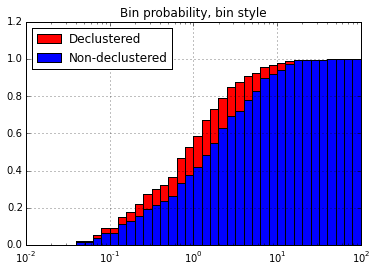

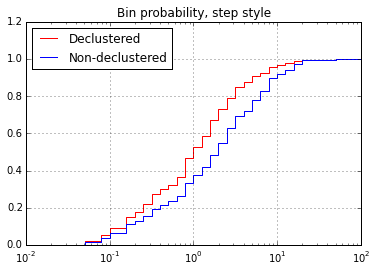

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Bin probability, bin style')
plt.bar (cld, binvald, width=-clwidth, color='r', label = 'Declustered')
plt.bar (cl, binval, width=-clwidth, label = 'Non-declustered')

if parameters_histplot['ilog']>0:
    ax.set_xscale('log')
plt.grid(True)
plt.legend(loc=2)
fig.show

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Bin probability, step style')
plt.step (cld, binvald, where='post', color='r', label = 'Declustered')
plt.step (cl, binval, where='post', label = 'Non-declustered')

if parameters_histplot['ilog']>0:
    ax.set_xscale('log')
plt.grid(True)
plt.legend(loc=2)
fig.show


In [12]:
print 'data min, max: ', xmin, xmax
print 'data quantile 2.5%, 25%, 50%, 75%, 97.75%: ' , xpt025,xlqt,xmed,xuqt,xpt975
print 'data cv, mean, variance : ',  xcvr,xmen,xvar
print 'hitogram max frequency (useful to rescal some plots)' , xfrmx
print 'error <> 0? Then all ok?' , error==0


data min, max:  0.06 58.32
data quantile 2.5%, 25%, 50%, 75%, 97.75%:  0.06 0.06 0.06 0.06 -48.3898812723
data cv, mean, variance :  1.54066617191 4.35042857143 44.9242855306
hitogram max frequency (useful to rescal some plots) 1.0
error <> 0? Then all ok? True
